In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()
#this tells no of duplicated values in the dataset.

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
#inplace=true means it will modify the existing database rather than creating a new one
#we dropped unnecessary features that will ease up our load later.

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
#get_dummies: convert categorical variables into dummy/indicator variables
#drop_first=True : Removes the first category to avoid redundancy and multicollinearity

In [13]:
print(df.columns)


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


In [14]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
#by this, we split the data set into two parts: one will be used to train model, other to test it.
#test size is the part of the data that will be used to test model
#random state: controls the random number generator used to shuffle the data before splitting it.

In [15]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [16]:
X_train.shape

(8000, 11)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
#standardscaler: adjusts data to have a mean of 0 and standard deviation of 1
#fit:compute the mean and std dev for a given feature
#transform:perform scaling using mean and std dev calculated using the .fit() method.
#fit_transform:does both fits and transform


In [18]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-05-24 15:08:14.437645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748099294.668166      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748099294.732941      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#sequential:for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#Sigmoid is equivalent to a 2-element softmax, where the second element is assumed to be zero. 
#The sigmoid function always returns a value between 0 and 1.
#RELU: Applies the rectified linear unit activation function.
#With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-24 15:08:28.365151: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#loss-> compute the quantity that a model should seek to minimize during training.
#optimizer-> determines how the network will be updated based on the loss function.
#binary_cross_entropy->quantifies the difference between the actual class labels (0 or 1) and the predicted probabilities output by the model.

In [23]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)
#epochs => measure the number of times the model has seen the entire dataset.
#validation_split=>Float between 0 and 1. 
#it is the fraction of the training data to be used as validation data.
#we defined this as history notebook to use it to plot graphs between diff metrics


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6455 - loss: 0.6395 - val_accuracy: 0.8006 - val_loss: 0.4808
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4676 - val_accuracy: 0.8175 - val_loss: 0.4308
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.4343 - val_accuracy: 0.8219 - val_loss: 0.4145
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4147 - val_accuracy: 0.8219 - val_loss: 0.4072
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8269 - loss: 0.4072 - val_accuracy: 0.8269 - val_loss: 0.4003
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.3918 - val_accuracy: 0.8281 - val_loss: 0.3954
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8333 - loss: 0.3952 - val_accuracy: 0.8313 - val_loss: 0.3919
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.3946 - val_accuracy: 0.

In [24]:
model.layers[1].get_weights()

[array([[ 0.17222302,  0.04387533, -0.3786796 ,  0.1353516 ,  0.42434537,
          0.37160954, -0.07260536,  0.10954025,  0.32287353, -0.11148736,
          0.45485386],
        [-0.6350491 , -0.23832925,  0.06409699,  0.55625534, -0.14288953,
         -0.20652437, -0.0980066 , -0.01377035,  0.26492143,  0.1625078 ,
          0.20851639],
        [ 0.03817414,  0.07940682,  0.38706723,  0.18801846, -0.13922602,
          0.5358523 ,  0.41437495,  0.0457134 , -0.01370219,  0.14060529,
         -0.39029068],
        [-0.07597991, -0.632862  ,  0.38616958,  0.28409144,  0.27808648,
         -0.01558829, -0.16799648, -0.19072153, -0.3810795 , -0.5131158 ,
          0.1518691 ],
        [-0.02859081, -0.3179309 , -0.00434698, -0.4279099 ,  0.2868271 ,
          0.25236088,  0.5849828 , -0.49708813, -0.1885634 , -0.21786946,
          0.44330564],
        [ 0.24998951, -0.26462856,  0.23006743, -0.29106826,  0.30828622,
          0.27892298,  0.6828725 , -0.21183445,  0.22789271,  0.2508908

In [25]:
y_log=model.predict(X_test_scaled)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [26]:
y_pred=np.where(y_log>0.5,1,0)
#we considered 0.5 as threshold above which binary value is 1 and below is 0

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8495

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'accuracy': [0.7275000214576721,
  0.8129687309265137,
  0.8254687786102295,
  0.8298437595367432,
  0.8321874737739563,
  0.8334375023841858,
  0.8364062309265137,
  0.840624988079071,
  0.84375,
  0.8482812643051147],
 'loss': [0.5729333758354187,
  0.44985541701316833,
  0.4217974543571472,
  0.41070231795310974,
  0.4029267132282257,
  0.3971996307373047,
  0.39082232117652893,
  0.38570091128349304,
  0.3794300854206085,
  0.3735574781894684],
 'val_accuracy': [0.8006250262260437,
  0.8174999952316284,
  0.8218749761581421,
  0.8218749761581421,
  0.8268749713897705,
  0.828125,
  0.831250011920929,
  0.8324999809265137,
  0.8368750214576721,
  0.8424999713897705],
 'val_loss': [0.48082661628723145,
  0.43077582120895386,
  0.4145486354827881,
  0.4071953594684601,
  0.40033310651779175,
  0.3954084813594818,
  0.3918570578098297,
  0.3873162865638733,
  0.3805709481239319,
  0.3742625117301941]}

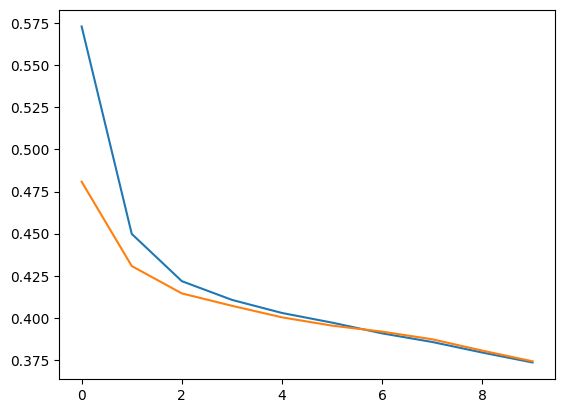

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

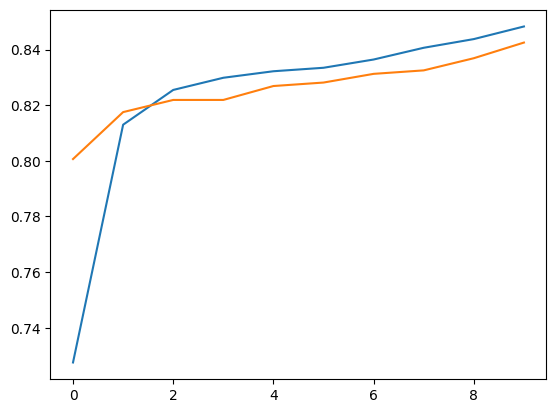

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])